# "Mau Sekolah di Mana?"
> "Visualisasi data dari banyak variabel menggunakan Principal Component Analysis"

- toc: false
- branch: master
- badges: true
- comments: true
- author: Elvyna Tunggawan
- categories: [statis]

*Disclaimer: post ini menggunakan data peringkat universitas dunia pada tahun 2016 menurut Times Higher Education, yang diunduh dari [Kaggle](https://www.kaggle.com/mylesoneill/world-university-rankings?select=timesData.csv).*

In [ ]:
#hide

options(warn=-1)
suppressWarnings(library(stringr))
suppressWarnings(library(dplyr))

DIRECTORY <- 'dataset/world-university-ranking/'
setwd(DIRECTORY)
df.times <- read.csv('datasets_27_792993_timesData.csv')
country.mapping <- read.csv('country.csv')
df.times$international <- as.numeric(df.times$international)


df.times$num_students <- as.numeric(str_replace(df.times$num_students,',',''))
df.times$total_score <- as.numeric(str_replace(df.times$total_score,'-',''))
df.times$world_rank <- as.numeric(str_replace(df.times$world_rank,'=',''))
df.times$international_students <- as.numeric(str_replace(df.times$international_students,'%','')) / 100
df.times$female.ratio <- as.numeric(sapply(str_split(df.times$female_male_ratio," : "), getElement, 1))

df.times$country <- as.character(df.times$country)
df.times$country <- ifelse(df.times$country == "Unisted States of America", "United States of America", 
                           ifelse(df.times$country == "Unted Kingdom", "United Kingdom", df.times$country)
                           )

df.times <- df.times %>% merge(country.mapping, how='left', by = c('country'='country'))
df.2016 <- df.times %>% filter(year == 2016)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Menurut versi ini, peringkat universitas ditentukan berdasarkan beberapa aspek, di antaranya yaitu (1) lingkungan belajar, (2) pandangan ranah internasional terhadap universitas, (3) reputasi dan jumlah penelitian, (4) pengaruh riset terhadap komunitas peneliti, (5) jumlah mahasiswa, (6) perbandingan mahasiswa dibanding staf, (7) proporsi mahasiswa internasional, dan 8) rasio mahasiswa perempuan dibanding laki-laki.

Kalau diperhatikan, aspek-aspek tersebut tidak terdistribusi normal. Misalnya, mayoritas universitas memiliki nilai sekitar 20-40 dalam hal lingkungan belajar (1) -- dan ada sedikit universitas dengan nilai lebih dari 75. Pola serupa terlihat dalam aspek (3), (5), (6), dan (7).

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


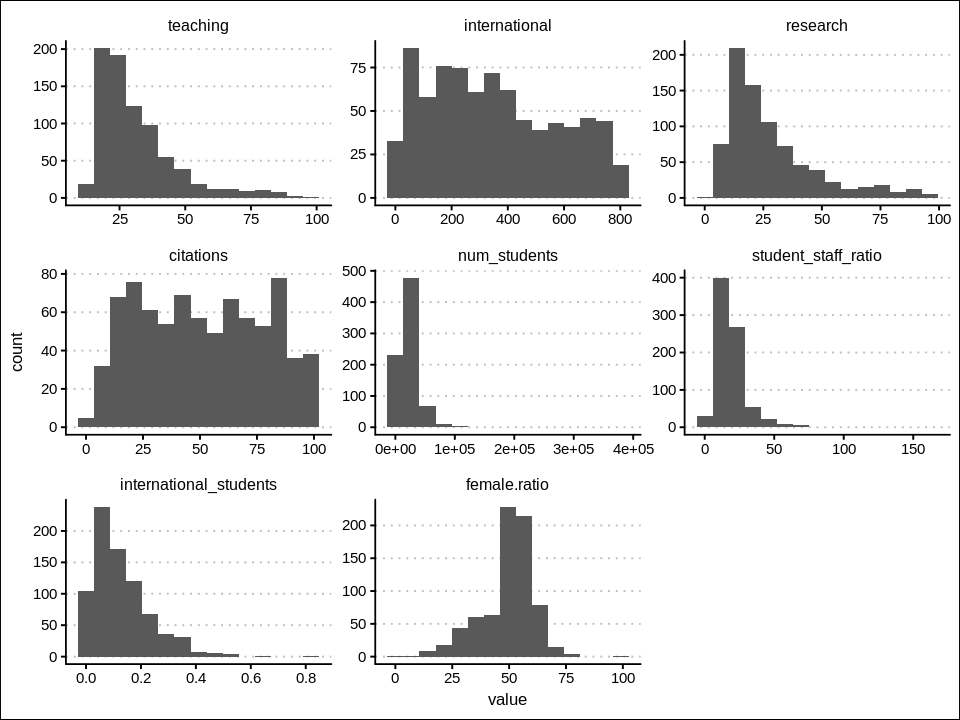

In [ ]:
#collapse-hide
suppressWarnings(library(ggplot2))
library(ggthemes)
theme_set(theme_clean())
library(reshape2)
library(repr)
options(repr.plot.width = 8, repr.plot.height = 6)

numeric.vars <- c('teaching', 'international', 'research', 'citations',
                  'num_students', 'student_staff_ratio', 'international_students', 'female.ratio')
df.2016.melt <- df.2016 %>% melt(id.vars = c('world_rank', 'university_name','country'),
                 measure.vars = numeric.vars)

ggplot(data = df.2016.melt) +
  geom_histogram(aes(x = value), bins = 15) +
  facet_wrap(.~variable, scales = 'free')

Mengingat jumlah variabel yang cukup banyak, memvisualisasikan sebaran universitas menjadi sulit. Salah satu teknik yang umum dilakukan untuk mengurangi dimensi data yaitu *Principal Component Analysis*. Singkatnya, teknik ini membentuk dimensi-dimensi baru berdasarkan kombinasi linear antarvariabel, dengan tujuan tetap menyimpan informasi perihal variansi data. Oke, supaya tidak membingungkan, mari kita lihat hasilnya.

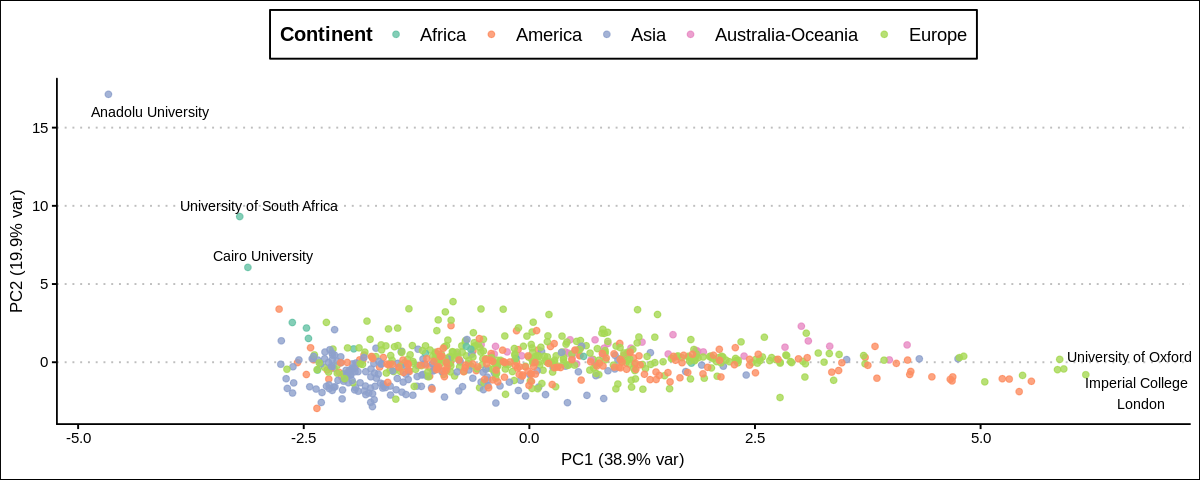

In [ ]:
#collapse-hide

## singkirkan observasi dengan data yang tidak lengkap
df.2016.complete <- df.2016[complete.cases(df.2016[, numeric.vars]),]
## komponen dibentuk menggunakan matriks korelasi, 
## karena rentang nilai variabel beragam
pc <- prcomp(df.2016.complete[, numeric.vars], scale = TRUE) 
df.2016.complete$pc1 <- pc$x[, 1]
df.2016.complete$pc2 <- pc$x[, 2]

options(repr.plot.width = 10, repr.plot.height = 4)
p <- ggplot(data = df.2016.complete) +
  geom_point(aes(
    x = pc1,
    y = pc2,
    col = as.factor(continent)
  ),
  alpha = 0.8) +
  scale_color_brewer(
    name = 'Continent',
    palette = 'Set2'
  ) + scale_x_continuous(
    name = 'PC1 (38.9% var)'
  ) + scale_y_continuous(
    name = 'PC2 (19.9% var)'
  ) + theme(
    legend.position = 'top',
    legend.direction = 'horizontal'
  ) + annotate(
      "text", 
      x = -4.2, 
      y = 16, 
      label = "Anadolu University", 
      size = 3, 
      colour = 'black', 
      face = "bold"
  ) + annotate(
      "text", 
      x = -3, 
      y = 10, 
      label = "University of South Africa", 
      size = 3, 
      colour = 'black', 
      face = "bold"
  ) + annotate(
      "text", 
      x = -2.95, 
      y = 6.8, 
      label = "Cairo University", 
      size = 3, 
      colour = 'black', 
      face = "bold"
  ) + annotate(
      "text", 
      x = 6.75, 
      y = -2, 
      label = "Imperial College \n London", 
      size = 3, 
      colour = 'black', 
      face = "bold"
  ) + annotate(
      "text", 
      x = 6.65, 
      y = 0.35, 
      label = "University of Oxford", 
      size = 3, 
      colour = 'black', 
      face = "bold"
  )

p

Dengan menggunakan dua komponen, 58% variansi pada data sudah bisa direpresentasikan. Meski tidak sempurna, sekarang kita bisa melihat sebaran universitas dengan lebih mudah, bukan? Berdasarkan grafik ini, terlihat ada beberapa universitas yang menjadi pencilan:

1. Anadolu University (Turki, Asia)
2. University of South Africa (Afrika Selatan, Afrika)
3. Cairo University (Mesir, Afrika)

Selain itu, komponen pertama (sumbu x) memiliki nilai dengan variasi lebih besar dibanding komponen kedua. Kalau diperhatikan, universitas dengan nilai tinggi pada komponen pertama merupakan universitas yang cukup terkenal, misalnya Imperial College London dan University of Oxford. 

Meskipun variabel asli sudah direduksi menjadi komponen-komponen ini, kita bisa melihat kira-kira variabel mana, *sih*, yang mempengaruhi suatu komponen. Seperti ditampilkan di bawah, komponen pertama memiliki korelasi positif dengan hal-hal terkait kualitas pembelajaran: kualitas penelitian, banyaknya jumlah kutipan, lingkungan pembelajaran, dan reputasi di ranah internasional. Sementara itu, komponen kedua berkaitan dengan jumlah mahasiswa dan komposisi mahasiswa perempuan dan laki-laki.

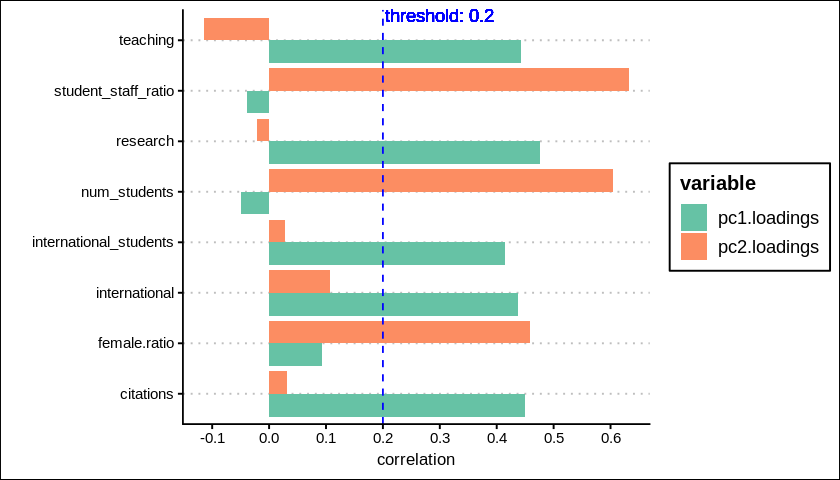

In [ ]:
#collapse-hide
pc.rotated <- varimax(pc$rotation[,1:2])
## hanya tampilkan variabel dengan korelasi >.2
# print(round(pc.rotated$loadings,2), cutoff=.2)

pc1.loadings <- pc.rotated$loadings[,1]
pc2.loadings <- pc.rotated$loadings[,2]
pc.rotated.loadings <- cbind(as.data.frame(pc1.loadings), as.data.frame(pc2.loadings))
pc.rotated.loadings$original.variable <- row.names(pc.rotated.loadings)

pc.rotated.loadings.melt <- pc.rotated.loadings %>% melt(
  id.vars = 'original.variable',
  measure.vars = c('pc1.loadings','pc2.loadings')
)

options(repr.plot.width = 7, repr.plot.height = 4)
ggplot(data = pc.rotated.loadings.melt) + geom_bar(
  aes(
    x = original.variable,
    y = value,
    fill = variable
    ), 
  stat = 'identity',
  position = 'dodge'
  ) + scale_fill_brewer(
    palette = 'Set2'
  ) + scale_x_discrete(
    name = ''
  ) + scale_y_continuous(
    name = 'correlation',
    breaks = seq(-1,1,.1)
  ) + geom_hline(
    yintercept = .2,
    color = 'blue',
    linetype = 'dashed'
  ) + geom_text(
    aes(
      x = 8.5,
      y = .3,
      label = 'threshold: 0.2'
      ), 
    colour = 'blue'
    ) + coord_flip()

Kalau kita lihat kembali grafik sebaran universitas sebelumnya, mungkin terasa agak janggal: hanya sedikit universitas di Asia dan Afrika yang memiliki nilai positif pada komponen pertama. Berarti, data ini mengindikasikan bahwa mayoritas universitas di Asia dan Afrika memiliki kualitas pembelajaran di bawah rata-rata jika dibandingkan dengan keseluruhan universitas di dunia. Apakah benar kenyataannya begitu, atau ada bias dalam penilaian? Mungkin teman-teman bisa mengeksplorasi sumber data lain dan membandingkannya.

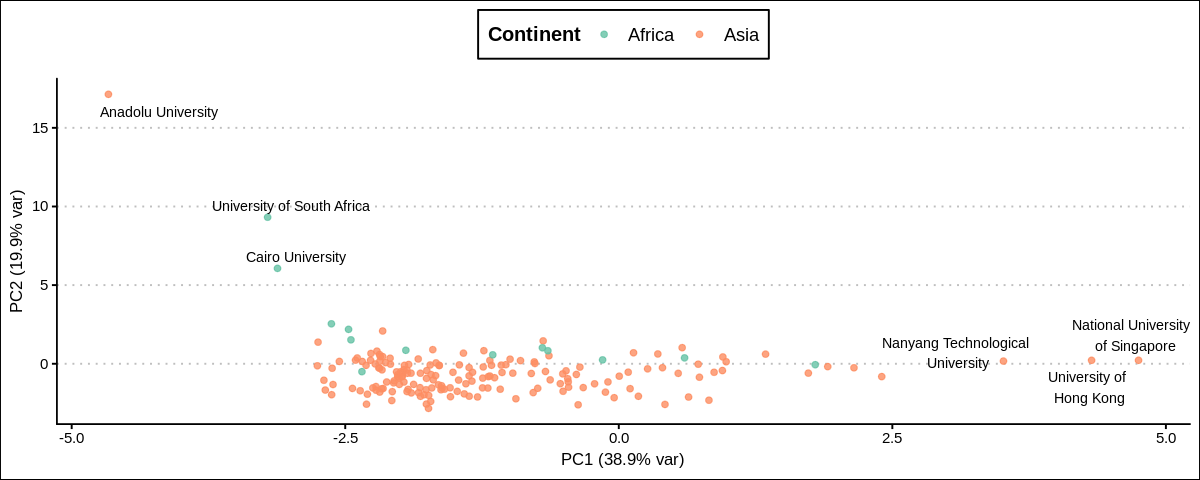

In [ ]:
#collapse-hide

df.2016.subset <- df.2016.complete %>% filter(continent %in% c('Asia','Africa'))
options(repr.plot.width = 10, repr.plot.height = 4)
ggplot(data = df.2016.subset) +
  geom_point(aes(
    x = pc1,
    y = pc2,
    col = as.factor(continent)
  ),
  alpha = 0.8) +
  scale_color_brewer(
    name = 'Continent',
    palette = 'Set2'
  ) + scale_x_continuous(
    name = 'PC1 (38.9% var)'
  ) + scale_y_continuous(
    name = 'PC2 (19.9% var)'
  ) + theme(
    legend.position = 'top',
    legend.direction = 'horizontal'
  ) + annotate(
      "text", 
      x = -4.2, 
      y = 16, 
      label = "Anadolu University", 
      size = 3, 
      colour = 'black', 
      face = "bold"
  ) + annotate(
      "text", 
      x = -3, 
      y = 10, 
      label = "University of South Africa", 
      size = 3, 
      colour = 'black', 
      face = "bold"
  ) + annotate(
      "text", 
      x = -2.95, 
      y = 6.8, 
      label = "Cairo University", 
      size = 3, 
      colour = 'black', 
      face = "bold"
  ) + annotate(
      "text", 
      x = 4.7, 
      y = 1.8, 
      label = "National University \n of Singapore", 
      size = 3, 
      colour = 'black', 
      face = "bold"
  ) + annotate(
      "text", 
      x = 4.3, 
      y = -1.5, 
      label = "University of \nHong Kong", 
      size = 3, 
      colour = 'black', 
      face = "bold"
  ) + annotate(
      "text", 
      x = 3.1, 
      y = 0.7, 
      label = "Nanyang Technological \nUniversity", 
      size = 3, 
      colour = 'black', 
      face = "bold"
  )